In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling Algorithms
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the data
df = pd.read_csv('student.csv')


In [5]:
X = df.drop(['math_score'], axis=1)
y = df['math_score']

In [6]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [9]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mse, rmse, r2

In [10]:
# Create a dictionary of models to evaluate 
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVR()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, rmse, r2 = evaluate_model(y_test, y_pred)
    model_list.append(model_name)
    r2_list.append(r2)
    print(f'{model_name} -> MSE: {mse}, RMSE: {rmse}, R2: {r2}')

Linear Regression -> MSE: 29.095169866715484, RMSE: 5.393993869732842, R2: 0.8804332983749565
Ridge -> MSE: 29.05627219234826, RMSE: 5.390387016935636, R2: 0.880593148502874
Lasso -> MSE: 42.50633235127343, RMSE: 6.5196880562856245, R2: 0.825320079562973
Random Forest -> MSE: 89.355, RMSE: 9.452777369641158, R2: 0.632795317138602
Gradient Boosting -> MSE: 83.87, RMSE: 9.158056562393574, R2: 0.6553359436899395
KNN -> MSE: 129.565, RMSE: 11.382662254499165, R2: 0.46755218247510466
SVM -> MSE: 66.04200493745648, RMSE: 8.126623218622633, R2: 0.7286001513223705


In [11]:
# Create a DataFrame to compare the models
pd.DataFrame({'model': model_list, 'r2': r2_list}).sort_values('r2', ascending=False)

,model,r2
1,Ridge,0.880593
0,Linear Regression,0.880433
2,Lasso,0.825320
6,SVM,0.728600
4,Gradient Boosting,0.655336
3,Random Forest,0.632795
5,KNN,0.467552


In [12]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'Linear Regression R2 Score: {score}')

Linear Regression R2 Score: 0.8804332983749565


Text(0, 0.5, 'Predictions')

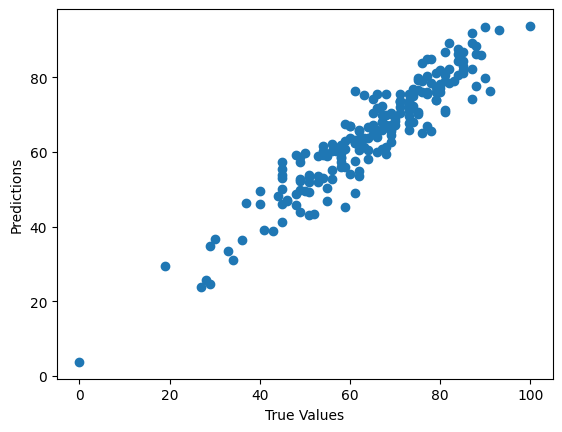

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

<Axes: xlabel='math_score'>

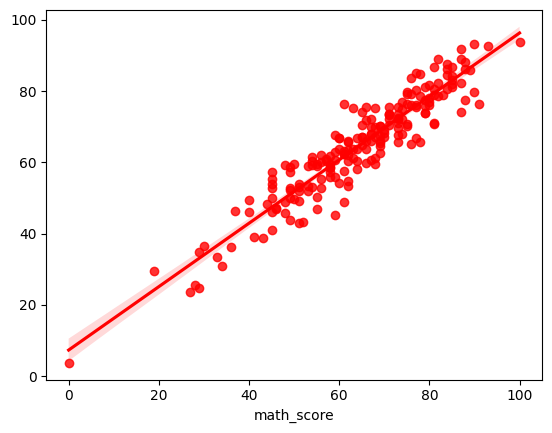

In [14]:
sns.regplot(x=y_test, y=y_pred, color='r')